# Etapa 1: Importação das bibliotecas

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils as np_utils
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import os
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



# Etapa 2: Carregamento e exploração da base de dados


## Ler base da dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
candidatos = pd.read_csv('/content/drive/MyDrive/P2/consulta_cand_2020_RJ.csv',sep=';',encoding = "ISO-8859-1")
receitas = pd.read_csv('/content/drive/MyDrive/P2/receitas_candidatos_2020_RJ.csv',sep=';',encoding = "ISO-8859-1")
despesas = pd.read_csv('/content/drive/MyDrive/P2/despesas_contratadas_candidatos_2020_RJ.csv',sep=';',encoding = "ISO-8859-1")


## Fazendo percebi que o dataset realmente ficara grande, então vou deixar comentado algumas infos

In [4]:
#candidatos.head()

In [5]:
#candidatos.info()

In [6]:
#receitas.info()

In [7]:
#despesas.info()

In [8]:
candidatos.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA,,,,'],
      dtype='object')

## Peço um ponto de atenção aqui, não sei se a formatação teve problemas quando baixei o arquivo. No resultado esperado que estava no colab não tinha esse excesso de virgulas depois da ultima coluna (do dataset candidatos), então quando for executar o meu arquivo e não estiver utilizando um dataset igual talvez tenha erros, por isso deixarei meus datasets no classroom tambem. pois como não sei se esse erro tava igual para todos ou foi problema apos meu download.

In [9]:
candidatos = candidatos.rename(columns = {'ST_CANDIDATO_INSERIDO_URNA,,,,': 'ST_CANDIDATO_INSERIDO_URNA'}, inplace = False)

In [10]:
candidatos.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'],
      dtype='object')

In [11]:
columns = ['NM_URNA_CANDIDATO', 'SG_PARTIDO','VR_DESPESA_MAX_CAMPANHA',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA']
candidatos.drop(columns, inplace=True, axis=1)

In [12]:
candidatos.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'NM_PARTIDO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO',
       'DS_SIT_TOT_TURNO'],
      dtype='object')

In [13]:
#deletar colunas

In [14]:
candidatos.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'NM_PARTIDO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO',
       'DS_SIT_TOT_TURNO'],
      dtype='object')

In [15]:
candidatos.head()

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
0,58246,PINHEIRAL,13,VEREADOR,51321,ELIVELTON DE ALMEIDA SILVA,4175260757,ELIVELTON.ALMEIDA@YAHOO.COM.BR,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,42,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,MOTORISTA DE VEÃCULOS DE TRANSPORTE DE CARGA,NÃO ELEITO
1,58491,MAGÃ,13,VEREADOR,27566,LAÃS SEPULVEDA MENESES,13642617743,LASEPULVEDA.03@GMAIL.COM,PARTIDO ISOLADO,27,DEMOCRACIA CRISTÃ,DC,1,28,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,"ESTUDANTE,BOLSISTA,ESTAGIÃRIO E ASSEMELHADOS",SUPLENTE
2,58467,MESQUITA,13,VEREADOR,55100,ALEXANDRE JOSÃ DE LIRA,2300609789,ALEXANDREAGAPE3@GMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÃTICO,PSD,1,49,MASCULINO,ENSINO MÃDIO INCOMPLETO,CASADO(A),PARDA,EMPRESÃRIO,SUPLENTE
3,58122,QUEIMADOS,13,VEREADOR,33777,ALEXANDER TEIXEIRA DA SILVA,7769437741,PRALEXANDERTEIXEIRA@GMAIL.COM,PARTIDO ISOLADO,33,PARTIDO DA MOBILIZAÃÃO NACIONAL,PMN,1,42,MASCULINO,ENSINO MÃDIO COMPLETO,CASADO(A),PARDA,OPERADOR DE APARELHOS DE PRODUÃÃO INDUSTRIAL,NÃO ELEITO
4,58599,MIRACEMA,13,VEREADOR,35222,FLAVIO JOSÃ CRUZ FRANCO,73696757772,PMBMIRACEMA35@GMAIL.COM,PARTIDO ISOLADO,35,PARTIDO DA MULHER BRASILEIRA,PMB,1,58,MASCULINO,ENSINO MÃDIO COMPLETO,DIVORCIADO(A),BRANCA,CONTADOR,NÃO ELEITO


##Carregar apenas os dados do Municipio pelo Cargo

###Criação variavel para caro e Municipio

In [16]:
cargo = 'VEREADOR'
municipio = 'CAMPOS DOS GOYTACAZES'


#Aqui eu notei que os dados estão desbalanciados, mais a frente irei utilizar uma tecnica para balanciar e não ter uma "Falsa acuracia" pois como um diferença enorma de dados o modelo ira acertar 90% so dizendo que o candidato é suplente.

In [17]:
df_canditado_mun = candidatos[(candidatos['NM_UE']==municipio) & (candidatos['DS_CARGO']==cargo) ]#
df_canditado_mun['DS_SIT_TOT_TURNO'].value_counts() #

SUPLENTE             494
NÃO ELEITO          278
#NULO#                21
ELEITO POR QP         13
ELEITO POR MÃDIA     12
Name: DS_SIT_TOT_TURNO, dtype: int64

Criar Dataframe com somente Candidatos de Campos

### Não repeti com os valores da celula anterior pois Notei que os Dataframes tem "Strings escritas diferentes"(VEREADOR != Vereador) pelo python ser case sensistive isso poderar atrapalhar, so trocarei caso seja encessario

Deixo essa vizualização comentada pois a resolução estara muito repetitiva, então deixarei so o essencial sem comentar, mas caso queria visualizar retire o "#"

In [18]:
df_receita_mun = receitas[(receitas['NM_UE']=='CAMPOS DOS GOYTACAZES') & (receitas['DS_CARGO']=='Vereador')]
#df_receita_mun.head()

In [19]:
df_despesa_mun = despesas[(despesas['NM_UE']=='CAMPOS DOS GOYTACAZES') & (despesas['DS_CARGO']=='Vereador')]
#df_despesa_mun.head()

## Determinar o valor total que cada Candidato  de receita e despesa contratada

In [20]:
df_receita_mun['VR_RECEITA'] = df_receita_mun['VR_RECEITA'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df_despesa_mun['VR_DESPESA_CONTRATADA'] = df_despesa_mun['VR_DESPESA_CONTRATADA'].apply(lambda x: float(x.split()[0].replace(',', '.')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
receitas_columns = df_receita_mun[['NR_CPF_CANDIDATO','VR_RECEITA']]
soma_cand_receita = receitas_columns.groupby('NR_CPF_CANDIDATO',as_index=False)['VR_RECEITA'].sum()#
soma_cand_receita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NR_CPF_CANDIDATO  792 non-null    int64  
 1   VR_RECEITA        792 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 18.6 KB


In [22]:
despesas_columns = df_despesa_mun[['NR_CPF_CANDIDATO','VR_DESPESA_CONTRATADA']]
soma_cand_despesa = despesas_columns.groupby('NR_CPF_CANDIDATO',as_index=False)['VR_DESPESA_CONTRATADA'].sum()
soma_cand_despesa  # total despesa por Candidato
soma_cand_despesa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NR_CPF_CANDIDATO       337 non-null    int64  
 1   VR_DESPESA_CONTRATADA  337 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [23]:
df_canditado_mun.head()

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
32,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÃOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÃTICO,PSD,1,55,FEMININO,ENSINO MÃDIO COMPLETO,VIÃVO(A),BRANCA,DONA DE CASA,SUPLENTE
67,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,70111,JOSÃ ARMANDO GOMES PIMENTA,709211724,AVANTEMUNICIPIOCAMPOS@GMAILCOM,PARTIDO ISOLADO,70,AVANTE,AVANTE,1,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,SUPLENTE
105,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12555,JOSE CARLOS DIAS DA SILVA,99061929768,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,PARTIDO DEMOCRÃTICO TRABALHISTA,PDT,1,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,SUPLENTE
108,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÃALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,REDE SUSTENTABILIDADE,REDE,1,39,MASCULINO,ENSINO MÃDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÃBLICO MUNICIPAL,NÃO ELEITO
120,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,51999,EDIVALDO VIEIRA DE AZEVEDO,1768302782,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,NÃO ELEITO


In [24]:
#cria um dataFrame com a juncao de todos os dados

# Agora que vou juntar todos os datasets perceba que o numero de linhas de cada um é diferente, então tomei a decisão de preencher a media de cada coluna nos valores faltantes, temos que fazer isso a cada junção para evitar problemas no futuro. (Excluindo ou colocando 0 tera um resultado muito ruim OBS:Aprendi na pratica...)

In [25]:
t_dataset1 = pd.merge(df_canditado_mun, soma_cand_despesa, on=["NR_CPF_CANDIDATO", "NR_CPF_CANDIDATO"])
t_dataset1 = df_canditado_mun.join(
    soma_cand_despesa.set_index(["NR_CPF_CANDIDATO", "NR_CPF_CANDIDATO"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["NR_CPF_CANDIDATO", "NR_CPF_CANDIDATO"],
)
mean=t_dataset1[['VR_DESPESA_CONTRATADA']].mean() # 6434.12
t_dataset1 = t_dataset1.replace(np.nan, mean)
t_dataset1.head()

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA
32,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÃOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÃTICO,PSD,1,55,FEMININO,ENSINO MÃDIO COMPLETO,VIÃVO(A),BRANCA,DONA DE CASA,SUPLENTE,10000.000000
67,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,70111,JOSÃ ARMANDO GOMES PIMENTA,709211724,AVANTEMUNICIPIOCAMPOS@GMAILCOM,PARTIDO ISOLADO,70,AVANTE,AVANTE,1,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,SUPLENTE,6434.127982
105,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12555,JOSE CARLOS DIAS DA SILVA,99061929768,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,PARTIDO DEMOCRÃTICO TRABALHISTA,PDT,1,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,SUPLENTE,6434.127982
108,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÃALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,REDE SUSTENTABILIDADE,REDE,1,39,MASCULINO,ENSINO MÃDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÃBLICO MUNICIPAL,NÃO ELEITO,200.000000
120,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,51999,EDIVALDO VIEIRA DE AZEVEDO,1768302782,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,NÃO ELEITO,6434.127982


In [26]:
t_datasets2 = pd.merge(t_dataset1, soma_cand_receita, on=["NR_CPF_CANDIDATO", "NR_CPF_CANDIDATO"])
t_datasets2.head()
t_datasets2 = t_dataset1.join(
    soma_cand_receita.set_index(["NR_CPF_CANDIDATO", "NR_CPF_CANDIDATO"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["NR_CPF_CANDIDATO", "NR_CPF_CANDIDATO"],
)
t_datasets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 32 to 26458
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UE                    818 non-null    int64  
 1   NM_UE                    818 non-null    object 
 2   CD_CARGO                 818 non-null    int64  
 3   DS_CARGO                 818 non-null    object 
 4   NR_CANDIDATO             818 non-null    int64  
 5   NM_CANDIDATO             818 non-null    object 
 6   NR_CPF_CANDIDATO         818 non-null    int64  
 7   NM_EMAIL                 818 non-null    object 
 8   TP_AGREMIACAO            818 non-null    object 
 9   NR_PARTIDO               818 non-null    int64  
 10  NM_PARTIDO               818 non-null    object 
 11  DS_COMPOSICAO_COLIGACAO  818 non-null    object 
 12  CD_NACIONALIDADE         818 non-null    int64  
 13  NR_IDADE_DATA_POSSE      818 non-null    int64  
 14  DS_GENERO              

In [27]:
receita_mean=t_datasets2[['VR_RECEITA']].mean() 
t_datasets2 = t_datasets2.replace(np.nan, receita_mean)
t_datasets2.head()

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA,VR_RECEITA
32,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÃOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÃTICO,PSD,1,55,FEMININO,ENSINO MÃDIO COMPLETO,VIÃVO(A),BRANCA,DONA DE CASA,SUPLENTE,10000.000000,11701.38
67,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,70111,JOSÃ ARMANDO GOMES PIMENTA,709211724,AVANTEMUNICIPIOCAMPOS@GMAILCOM,PARTIDO ISOLADO,70,AVANTE,AVANTE,1,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,SUPLENTE,6434.127982,1179.70
105,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12555,JOSE CARLOS DIAS DA SILVA,99061929768,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,PARTIDO DEMOCRÃTICO TRABALHISTA,PDT,1,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,SUPLENTE,6434.127982,8246.85
108,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÃALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,REDE SUSTENTABILIDADE,REDE,1,39,MASCULINO,ENSINO MÃDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÃBLICO MUNICIPAL,NÃO ELEITO,200.000000,700.00
120,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,51999,EDIVALDO VIEIRA DE AZEVEDO,1768302782,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,NÃO ELEITO,6434.127982,4761.85


In [28]:
t_datasets2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 32 to 26458
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UE                    818 non-null    int64  
 1   NM_UE                    818 non-null    object 
 2   CD_CARGO                 818 non-null    int64  
 3   DS_CARGO                 818 non-null    object 
 4   NR_CANDIDATO             818 non-null    int64  
 5   NM_CANDIDATO             818 non-null    object 
 6   NR_CPF_CANDIDATO         818 non-null    int64  
 7   NM_EMAIL                 818 non-null    object 
 8   TP_AGREMIACAO            818 non-null    object 
 9   NR_PARTIDO               818 non-null    int64  
 10  NM_PARTIDO               818 non-null    object 
 11  DS_COMPOSICAO_COLIGACAO  818 non-null    object 
 12  CD_NACIONALIDADE         818 non-null    int64  
 13  NR_IDADE_DATA_POSSE      818 non-null    int64  
 14  DS_GENERO              

### Muitos dados estão com caracteres não legiveis e como isso depois se tornara um app web ja vou efetuar a mudança para que possamos ter dados mais esteticos futuramente.

In [29]:
dados= t_datasets2
dados = dados.replace(['ELEITO POR QP','ELEITO POR MÃDIA'],'Eleito')
dados = dados.replace(['NÃO ELEITO'],'Nao Eleito')
dados = dados.replace(['SUPLENTE'],'Suplente')
dados.drop(dados.index[dados['DS_SIT_TOT_TURNO'] == '#NULO#'], inplace = True)
dados = dados.replace(['LÃ E ESCREVE'],'Le e escreve')
dados = dados.replace(['ENSINO MÃDIO INCOMPLETO'],'ENSINO MEDIO IMCOMPLETO')
dados = dados.replace(['ENSINO MÃDIO COMPLETO'],'ENSINO MEDIO COMPLETO')
dados = dados.replace(['VIÃVO(A)'],'VIUVO(A)')

#Agora com dados organizados, preenchidos e legiveis esta na hora de excluir os dados que não usaremos de entrada e lapidar nosso dataset

In [30]:
tdados=dados.copy()
columns = ['CD_CARGO','DS_CARGO','SG_UE','NM_UE','NR_CANDIDATO','NM_CANDIDATO','NR_CPF_CANDIDATO','NR_CANDIDATO','NR_CANDIDATO','NM_EMAIL','TP_AGREMIACAO','NR_PARTIDO','DS_COMPOSICAO_COLIGACAO','CD_NACIONALIDADE']
tdados.drop(columns, inplace=True, axis=1)
tdados=tdados.rename(columns={"NR_IDADE_DATA_POSSE": "Idade", "DS_GENERO": "Genero","DS_GRAU_INSTRUCAO": "Escolaridade","DS_ESTADO_CIVIL": "Estado_civil","DS_COR_RACA": "Raça","DS_OCUPACAO": "Ocupacao",'NM_PARTIDO':'Partido',"DS_SIT_TOT_TURNO": "Situacao"})
tdados

,Partido,Idade,Genero,Escolaridade,Estado_civil,Raça,Ocupacao,Situacao,VR_DESPESA_CONTRATADA,VR_RECEITA
32,PARTIDO SOCIAL DEMOCRÃTICO,55,FEMININO,ENSINO MEDIO COMPLETO,VIUVO(A),BRANCA,DONA DE CASA,Suplente,10000.000000,11701.38
67,AVANTE,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,Suplente,6434.127982,1179.70
105,PARTIDO DEMOCRÃTICO TRABALHISTA,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,Suplente,6434.127982,8246.85
108,REDE SUSTENTABILIDADE,39,MASCULINO,ENSINO MEDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÃBLICO MUNICIPAL,Nao Eleito,200.000000,700.00
120,PATRIOTA,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,Nao Eleito,6434.127982,4761.85
...,...,...,...,...,...,...,...,...,...,...
26380,DEMOCRACIA CRISTÃ,55,MASCULINO,ENSINO MEDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR,Nao Eleito,325.500000,5716.85
26389,PARTIDO LIBERAL,55,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,EMPRESÃRIO,Suplente,1300.000000,6461.85
26407,PARTIDO SOCIALISTA BRASILEIRO,43,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,NUTRICIONISTA E ASSEMELHADOS,Nao Eleito,6434.127982,1387.04
26411,PARTIDO DA MOBILIZAÃÃO NACIONAL,53,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,Nao Eleito,6434.127982,187.50


## Aqui temos que categorizar os dados, para ter um bom resultado do algorimo utilizaremos o get_dummies.
#OBS : Como não temos somente dois valores de saida (0 e 1) temos que categorizar o Y depois, pois o algoritmo sera capaz de dizer se o candidato sera: SUPLENTE, NÃO ELEITO E ELEITO.




In [31]:
m_dados = pd.get_dummies(tdados, columns=["Genero","Estado_civil",
                                                 "Raça",'Escolaridade','Ocupacao','Partido'
                                                ])
m_dados.head()

,Idade,Situacao,VR_DESPESA_CONTRATADA,VR_RECEITA,Genero_FEMININO,Genero_MASCULINO,Estado_civil_CASADO(A),Estado_civil_DIVORCIADO(A),Estado_civil_SEPARADO(A) JUDICIALMENTE,Estado_civil_SOLTEIRO(A),Estado_civil_VIUVO(A),Raça_AMARELA,Raça_BRANCA,Raça_INDÃGENA,Raça_PARDA,Raça_PRETA,Raça_SEM INFORMAÃÃO,Escolaridade_ENSINO FUNDAMENTAL COMPLETO,Escolaridade_ENSINO FUNDAMENTAL INCOMPLETO,Escolaridade_ENSINO MEDIO COMPLETO,Escolaridade_ENSINO MEDIO IMCOMPLETO,Escolaridade_Le e escreve,Escolaridade_SUPERIOR COMPLETO,Escolaridade_SUPERIOR INCOMPLETO,Ocupacao_ADMINISTRADOR,Ocupacao_ADVOGADO,Ocupacao_AGENTE ADMINISTRATIVO,Ocupacao_AGENTE DE SAÃDE E SANITARISTA,Ocupacao_AGRICULTOR,Ocupacao_ALFAIATE E COSTUREIRO,Ocupacao_ALMOXARIFE,Ocupacao_APOSENTADO (EXCETO SERVIDOR PÃBLICO),Ocupacao_ARQUITETO,Ocupacao_ARTESÃO,Ocupacao_ASSISTENTE SOCIAL,Ocupacao_ATLETA PROFISSIONAL E TÃCNICO EM DESPORTOS,Ocupacao_AUXILIAR DE ESCRITÃRIO E ASSEMELHADOS,Ocupacao_AUXILIAR DE LABORATÃRIO,Ocupacao_BANCÃRIO E ECONOMIÃRIO,Ocupacao_BIÃLOGO,...,Ocupacao_TORNEIRO MECÃNICO,Ocupacao_TRABALHADOR DE CONSTRUÃÃO CIVIL,Ocupacao_TRABALHADOR DE HOTELARIA,Ocupacao_TRABALHADOR METALÃRGICO E SIDERÃRGICO,"Ocupacao_TÃCNICO CONTABILIDADE,ESTATÃSTICA,ECONOMIA DOMÃSTICA E ADMINISTRAÃÃO","Ocupacao_TÃCNICO DE ELETRICIDADE,ELETRÃNICA E TELECOMUNICAÃÃES",Ocupacao_TÃCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO),Ocupacao_TÃCNICO DE LABORATÃRIO E RAIOS X,Ocupacao_TÃCNICO DE MECÃNICA,Ocupacao_TÃCNICO EM AGRONOMIA E AGRIMENSURA,Ocupacao_VENDEDOR DE COMÃRCIO VAREJISTA E ATACADISTA,"Ocupacao_VENDEDOR PRACISTA,REPRESENTANTE,CAIXEIRO-VIAJANTE E ASSEMELHADOS",Ocupacao_VEREADOR,Ocupacao_VIGILANTE,Partido_AVANTE,Partido_CIDADANIA,Partido_DEMOCRACIA CRISTÃ,Partido_DEMOCRATAS,Partido_MOVIMENTO DEMOCRÃTICO BRASILEIRO,Partido_PARTIDO COMUNISTA DO BRASIL,Partido_PARTIDO DA MOBILIZAÃÃO NACIONAL,Partido_PARTIDO DA MULHER BRASILEIRA,Partido_PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,Partido_PARTIDO DEMOCRÃTICO TRABALHISTA,Partido_PARTIDO DOS TRABALHADORES,Partido_PARTIDO LIBERAL,Partido_PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,Partido_PARTIDO REPUBLICANO DA ORDEM SOCIAL,Partido_PARTIDO SOCIAL CRISTÃO,Partido_PARTIDO SOCIAL DEMOCRÃTICO,Partido_PARTIDO SOCIAL LIBERAL,Partido_PARTIDO SOCIALISMO E LIBERDADE,Partido_PARTIDO SOCIALISTA BRASILEIRO,Partido_PARTIDO TRABALHISTA BRASILEIRO,Partido_PARTIDO TRABALHISTA CRISTÃO,Partido_PATRIOTA,Partido_PODEMOS,Partido_REDE SUSTENTABILIDADE,Partido_REPUBLICANOS,Partido_SOLIDARIEDADE
32,55,Suplente,10000.000000,11701.38,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
67,51,Suplente,6434.127982,1179.70,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,56,Suplente,6434.127982,8246.85,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108,39,Nao Eleito,200.000000,700.00,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
120,49,Nao Eleito,6434.127982,4761.85,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Um boa pratica para facilitar a separação de X e Y é deixar a variavel Y nos extremos do dataset, isso facilitara mais a frente, por isso eu exclui a coluna e coloquei ela de volta no final do dataset.

In [32]:
column_to_reorder  = m_dados.pop('Situacao')
m_dados.insert(len(m_dados. columns), 'Situacao', column_to_reorder)
m_dados.to_csv("Eleicao.csv",  index = False)
m_dados.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 32 to 26458
Columns: 162 entries, Idade to Situacao
dtypes: float64(2), int64(1), object(1), uint8(158)
memory usage: 154.1+ KB


# Sabendo que o numero de colunas no dataset eu posso separar X e Y, sabendo que Y esta na ultima coluna eu irei pegar todas para X exceto a ultima e para Y somente a ultima claro.

## Separei x e y para começar  a treinar meu modelo

In [33]:
#len(m_dados.columns)
dados_final = m_dados.values
X = dados_final[:,0:161].astype('float32')
X


array([[   55.   , 10000.   , 11701.38 , ...,     0.   ,     0.   ,
            0.   ],
       [   51.   ,  6434.128,  1179.7  , ...,     0.   ,     0.   ,
            0.   ],
       [   56.   ,  6434.128,  8246.85 , ...,     0.   ,     0.   ,
            0.   ],
       ...,
       [   43.   ,  6434.128,  1387.04 , ...,     0.   ,     0.   ,
            0.   ],
       [   53.   ,  6434.128,   187.5  , ...,     0.   ,     0.   ,
            0.   ],
       [   57.   ,   680.   ,  6191.85 , ...,     0.   ,     0.   ,
            0.   ]], dtype=float32)

In [34]:
Y=dados_final[:,161] #Atenção ainda esta com tipo string.
#Y

##Ao modelar problemas de classificação multiclasse usando redes neurais, é uma boa prática remodelar o atributo de saída de um vetor que contém valores para cada valor de classe para ser uma matriz com um booleano para cada valor de classe e se uma determinada instância tem ou não isso valor da classe ou não.

In [35]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

##Podemos fazer isso primeiro codificando as strings de forma consistente para inteiros usando a classe LabelEncoder do scikit-learn. Depois podemos converter o vetor de inteiros em uma codificação única usando a função Keras to_categorical ().

In [36]:
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# Agora minha variavel Y esta pronta, tiver que fazer isso pois o modelo tera  3 saidas pois temos multivalores possiveis

In [37]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True)

In [38]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.6140351  0.0938732  0.10905632 ... 0.         0.         0.        ]
 [0.5438596  0.06036907 0.01070098 ... 0.         0.         0.        ]
 [0.6315789  0.06036907 0.0767638  ... 0.         0.         0.        ]
 ...
 [0.40350875 0.06036907 0.01263917 ... 0.         0.         0.        ]
 [0.5789474  0.06036907 0.00142602 ... 0.         0.         0.        ]
 [0.64912283 0.00630457 0.05755392 ... 0.         0.         0.        ]]


# Aqui vou aplicar o SMOTE SMOTE (Synthetic Minority Over-sampling Technique) que ira gerar dados sinteticos para classe minoritaria no caso a variavel ELEITO

In [39]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE()
X_scale, dummy_y = smt.fit_resample(X_scale, dummy_y)

# Agora irei separar dados de Treino, Teste e o de validação, pois no final vou conferir o quanto esse algoritimo esta em relação aos dados de treino.

In [40]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, dummy_y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1037, 161) (222, 161) (223, 161) (1037, 3) (222, 3) (223, 3)


In [41]:
model = Sequential([
    Dense(4, activation='relu', input_dim=161),
    Dense(1, activation='relu'),
    Dense(3, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 648       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
Total params: 659
Trainable params: 659
Non-trainable params: 0
_________________________________________________________________


In [43]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True)

In [44]:
%%time
hist = model.fit(X_train, Y_train,
          batch_size=10, epochs=80,
          validation_data=(X_val, Y_val),callbacks=[checkpoint_callback])

Epoch 1/80
104/104 [==============================] - 1s 4ms/step - loss: 1.0919 - accuracy: 0.4012 - val_loss: 1.0826 - val_accuracy: 0.4640
Epoch 2/80
104/104 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.5024 - val_loss: 1.0201 - val_accuracy: 0.5045
Epoch 3/80
104/104 [==============================] - 0s 2ms/step - loss: 0.9735 - accuracy: 0.5911 - val_loss: 0.9032 - val_accuracy: 0.6306
Epoch 4/80
104/104 [==============================] - 0s 2ms/step - loss: 0.8638 - accuracy: 0.6538 - val_loss: 0.8081 - val_accuracy: 0.6577
Epoch 5/80
104/104 [==============================] - 0s 2ms/step - loss: 0.7792 - accuracy: 0.6779 - val_loss: 0.7429 - val_accuracy: 0.6622
Epoch 6/80
104/104 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.6770 - val_loss: 0.6980 - val_accuracy: 0.6802
Epoch 7/80
104/104 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6837 - val_loss: 0.6655 - val_accuracy: 0.6802
Epoch 

In [45]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_80'

In [46]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'./training_checkpoints/ckpt_80'

## [[SUPLETE],[NAO ELEITO],[ELEITO]]

In [47]:
score = model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 97.59%


# OBS: Sem o metodo SMOTE ou NearMiss por exemplo eu chegaria numa acuracia bem parecida, mas para provar que o modelo esta balanceado e o algoritimo so não acertou 95% por que 95% era suplente. aqui reduzimos isso pois o modelo não se "Viciou na classe majoritaria"

In [73]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test[1:220])
report = classification_report(Y_val[1:220], prediction.round())
print(report)

              precision    recall  f1-score   support

           0       0.34      0.32      0.33        72
           1       0.35      0.37      0.36        75
           2       0.32      0.32      0.32        72

   micro avg       0.34      0.34      0.34       219
   macro avg       0.34      0.34      0.34       219
weighted avg       0.34      0.34      0.34       219
 samples avg       0.34      0.34      0.34       219



In [48]:
prediction = model.predict(X_test[1:2]) # nao eleito, ultimo suplente
print(prediction)
print(prediction[0,0:1])
print(prediction[0,1:2])
print(prediction[0,2:])
if prediction[0,2:]> prediction[0,0:1] and prediction[0,2:]> prediction[0,1:2]:
  print("Não sera eleito mas tem chances de ser suplente")
elif prediction[0,0:1] > prediction[0,2:]  and prediction[0,0:1] > prediction[0,1:2]:
  print("Candidato sera eleito")
else :
  print("Não sera eleito")



[[3.2345968e-33 9.9598491e-01 4.0151109e-03]]
[3.2345968e-33]
[0.9959849]
[0.00401511]
não sera eleito


## Na predição acima entao que provavelmente o candidato seria eleito

#Modelo treinado salvado e testado, agora vou demonstrar algumas visualizações para ver se realmente esta coerente com a realidade.

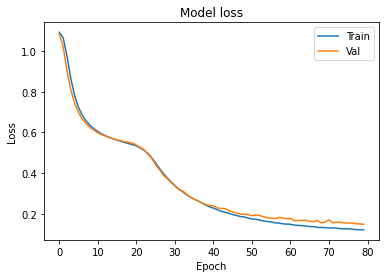

In [49]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

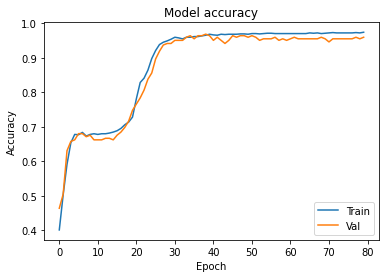

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [51]:
entrada=m_dados.copy()
entrada.pop('Situacao') 
colunas=entrada.columns
print(colunas)

Index(['Idade', 'VR_DESPESA_CONTRATADA', 'VR_RECEITA', 'Genero_FEMININO',
       'Genero_MASCULINO', 'Estado_civil_CASADO(A)',
       'Estado_civil_DIVORCIADO(A)', 'Estado_civil_SEPARADO(A) JUDICIALMENTE',
       'Estado_civil_SOLTEIRO(A)', 'Estado_civil_VIUVO(A)',
       ...
       'Partido_PARTIDO SOCIAL LIBERAL',
       'Partido_PARTIDO SOCIALISMO E LIBERDADE',
       'Partido_PARTIDO SOCIALISTA BRASILEIRO',
       'Partido_PARTIDO TRABALHISTA BRASILEIRO',
       'Partido_PARTIDO TRABALHISTA CRISTÃO', 'Partido_PATRIOTA',
       'Partido_PODEMOS', 'Partido_REDE SUSTENTABILIDADE',
       'Partido_REPUBLICANOS', 'Partido_SOLIDARIEDADE'],
      dtype='object', length=161)


In [52]:
#SAVALNDO
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
 

Saved model to disk


In [53]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [55]:

loaded_model.load_weights("model.h5")

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


accuracy: 97.59%


In [56]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [57]:
#np.save('my_history.npy',hist.history)
#history=np.load('my_history.npy',allow_pickle='TRUE').item()
#history
model_cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir)
history_cb = tf.keras.callbacks.CSVLogger('./log.csv', separator=",", append=False)
